In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd 
import numpy  as np



%matplotlib inline

In [2]:
data = pd.read_csv("emnist-letters-train.csv")

In [3]:
data.iloc[:,0]=data.iloc[:,0]-1

In [4]:
data.iloc[:,0].min(),data.iloc[:,0].max()

(0, 25)

In [5]:
x = data.iloc[:,1:].values
y=data.iloc[:,0].values
x.shape,y.shape

((88799, 784), (88799,))

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,stratify=y,shuffle=True)

In [7]:
x_train = x_train / 255
x_test = x_test / 255

In [8]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((71039, 784), (17760, 784), (71039,), (17760,))

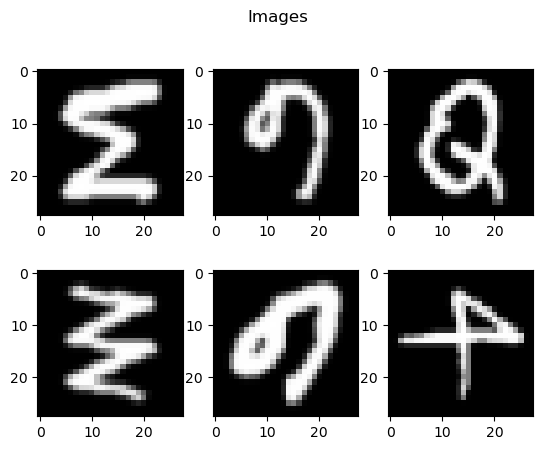

In [9]:
plt.suptitle('Images')
for i in range(6):
    image = x_train[i].reshape((28,28))
    plt.subplot(2,3,i+1)
    plt.imshow(image,cmap="gray")

In [5]:
model = Sequential([
    tf.keras.Input(shape=(784,)),
    Dense(units=512, activation="relu", name="layer1"),
    Dropout(0.5, name = "drop1"),  
    Dense(units=256, activation="relu", name="layer2"),
    Dropout(0.5, name = "drop2"),  
    Dense(units=26, activation="softmax", name="layer3")  # Changed activation to softmax
], name="MyModel")

In [11]:
model.summary()

Model: "MyModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 539,930 (2.06 MB)

 Trainable params: 539,930 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
[layer1,drop1,layer2,drop2,layer3]=model.layers

w1,b1=layer1.get_weights()
w2,b2=layer2.get_weights()
w3,b3=layer3.get_weights()

print(f"w1 shape:{w1.shape} , b1 shape: {b1.shape}")
print(f"w2 shape:{w2.shape} , b2 shape: {b2.shape}")
print(f"w3 shape:{w3.shape} , b3 shape: {b3.shape}")

w1 shape:(784, 512) , b1 shape: (512,)
w2 shape:(512, 256) , b2 shape: (256,)
w3 shape:(256, 26) , b3 shape: (26,)


In [7]:
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True)
              ,optimizer=Adam(learning_rate=1e-3)
              , metrics=["accuracy"]
)

In [14]:
x_train=np.array(x_train)

In [15]:
Letter_recognition=model.fit(
    x_train,y_train,
    epochs=100,batch_size=32
)

Epoch 1/100


c:\Users\Amir\anaconda3\lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1806/2220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5160 - loss: 1.6313

KeyboardInterrupt: 

NameError: name 'Letter_recognition' is not defined

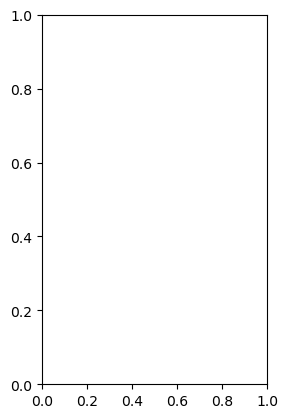

In [16]:
plt.subplot(1, 2, 1)
plt.plot(Letter_recognition.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(Letter_recognition.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
prediction_model=model.predict(x_test)

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 929us/step


In [18]:
prediction_p=tf.nn.softmax(prediction_model)
predicted_labels = np.argmax(prediction_p, axis=1)

In [19]:
loss,Accuracy=model.evaluate(x_test,y_test)

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step - accuracy: 0.9034 - loss: 0.3478


In [20]:
Accuracy

0.902195930480957

In [21]:
def letter(prediction):
         letters={i: chr(ord('a') + i) for i in range(26)}
    
         return letters[prediction]

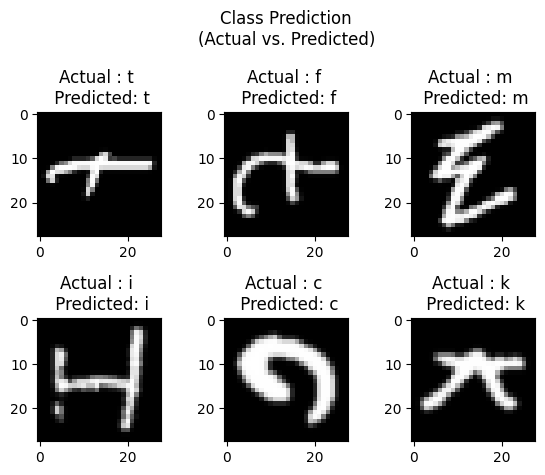

In [22]:
plt.suptitle("Class Prediction\n(Actual vs. Predicted)")
for i in range(6):
    image = x_test[i].reshape((28,28))
    plt.subplot(2,3,i+1)
    plt.title(f"Actual : {letter(y_test[i])} \n Predicted: {letter(predicted_labels[i])}")
    plt.imshow(image,cmap="gray")
    plt.tight_layout()

In [23]:
conf_matrix = confusion_matrix(y_test,predicted_labels)
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted')  
recall = recall_score(y_test, predicted_labels, average='weighted')  
f1 = f1_score(y_test, predicted_labels, average='weighted')  

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 90.22%
Precision: 0.90
Recall: 0.90
F1 Score: 0.90


<Axes: >

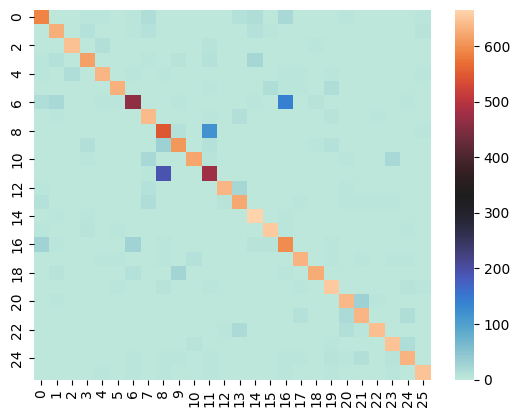

In [24]:
sns.heatmap(conf_matrix,cmap='icefire')

In [25]:
model.save("OCRusingANN.h5")

In [1]:
import cv2
import numpy as np

c:\Users\Amir\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Amir\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
c:\Users\Amir\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [28]:
# Load the image
image1 = cv2.imread("test_AA.jpg")

# Resize the image to the desired dimensions
image1 = cv2.resize(image1, (28, 28))

# Convert the image to grayscale
image_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

flipped_image = cv2.flip(image_gray, 1)

image_rotated = cv2.rotate(flipped_image, cv2.ROTATE_90_COUNTERCLOCKWISE)#image_gray = cv2.bilateralFilter(image_gray,15,27,27)
#image_gray

In [29]:
# Reshape the image to flatten it
npImage = np.array(image_rotated).flatten()

# Reshape to match expected input shape of the model
npImage = npImage.reshape(1, -1)  # Reshape to (1, 784) assuming it's a single image

# Assuming `model` is already defined and compiled
# Make sure your model is expecting input in the shape (None, 784)
# The `predict` method usually expects an array of inputs, so we pass the reshaped image
imgList = [npImage]

In [30]:
prediction_model=model.predict(npImage)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [31]:
prediction_p=tf.nn.softmax(prediction_model)
predicted_labels = np.argmax(prediction_p, axis=1)
print(predicted_labels)

[6]


In [32]:
def letter(prediction):
         letters={i: chr(ord('A') + i) for i in range(26)}
    
         return letters[prediction]

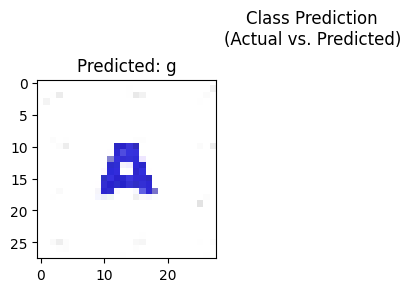

In [33]:
plt.suptitle("Class Prediction\n(Actual vs. Predicted)")
for i in range(1):
    image = imgList[i].reshape((28,28))
    #image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)    
    plt.subplot(2,3,i+1)
    plt.title(f"Predicted: {letter(predicted_labels[i])}")
    plt.imshow(image1, cmap = 'gray')
    plt.tight_layout()

In [8]:
model = tf.keras.models.load_model('OCRusingANN.h5')

In [1]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk


prediction_mapping = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E',
    5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
    10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O',
    15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T',
    20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'
}

def browse_file():
    # global filename_string
    filename = filedialog.askopenfilename(
        filetypes=[("Image files", "*.jpg;*.jpeg;*.png;*.gif")]
    )
    if filename:
        # filename_string.set(filename)  # Set the filename to the string variable
        display_image(filename)

def display_image(filename):
    image = Image.open(filename)
    image.thumbnail((500, 500))  # Resize image to fit in the window
    photo = ImageTk.PhotoImage(image)

    # Display the image in a label
    label.config(image=photo)
    label.image = photo  # Keep a reference to the image to prevent garbage collection

    # Read the image using OpenCV with the selected filename
    image_cv2 = cv2.imread(filename)
    image_cv2 = cv2.resize(image_cv2, (28, 28))  # Resize the image
    image_gray = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2GRAY)
    flipped_image = cv2.flip(image_gray, 1)
    image_rotated = cv2.rotate(flipped_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    npImage = np.array(image_rotated).flatten()
    npImage = npImage.reshape(1, -1)  # Reshape to (1, 784) assuming it's a single image

    # Perform prediction
    prediction_model=model.predict(npImage)

    prediction_p=tf.nn.softmax(prediction_model)
    predicted_labels = np.argmax(prediction_p, axis=1)
    print(predicted_labels)

    def letter(prediction):
         letters={i: chr(ord('A') + i) for i in range(26)}
    
         return letters[prediction]
    
    

    text_entry.delete(0, tk.END)  # Clear existing text
    # text_entry.insert(0, str(predictions))  # Insert prediction result
    text_entry.insert(0, letter(predicted_labels[0]))  # Insert prediction result

    
    # root.update_idletasks()

# Create the main application window
root = tk.Tk()
root.title("Handwritten OCR using ANN")
root.geometry("800x600")  # Set initial window size

# Create a button to browse for a photo
browse_button = tk.Button(root, text="Browse Photo", command=browse_file)
browse_button.pack(pady=10)

# Create a label to display the photo
label = tk.Label(root)
label.pack()

# Add an empty text field below the image
# filename_string = tk.StringVar() # String variable to hold the filename
text_entry = tk.Entry(root)
text_entry.pack(pady=10)

# Start the Tkinter event loop
root.mainloop()
